In [1]:
import camelot
import pandas as pd
import re
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
def process_dailycount_pdf(fname):
    
    date_RE = re.compile(r'((\d{1,2})/(\d{1,2})/(202\d))')
    
    sci_map = { 'Quehanna': 'Quehanna BC',
                'Coal Twnp': 'Coal Township',
                'Benner': 'Benner Township',
                'Laurel High':'Laurel Highlands'
              }
  
    colmap = {
     'Inmate Active Positive Cases': 'incarcerated_person_active_positive',
     'Asymptomatic Inmate Positive': 'incarcerated_person_asymptomatic_positive',
     'Asymptomatic Inmate Positive Cases':'incarcerated_person_asymptomatic_positive',
     'Inmate Deaths To Date': 'incarcerated_person_deaths',
     'Employee Active Positive Cases': 'staff_active_cases',
     'Employee Deaths To Date': 'staff_deaths' ,
     'Sci': 'SCI'
    }
    
    
    # 1. process PDF file with camelot
    fpath = f'../data/DOC_daily_counts/{fname}'
    tlist=camelot.read_pdf(fpath)
    
    # 2. extract date from first row heading
    cdate=date_RE.search(tlist[0].df.loc[0][0]).group()
    
    # 3. get column names from 2nd row
    colnames = [c.replace('\n','').title() for c in tlist[0].df.loc[1].to_list()]

    # 4. create data frame 
    tdf=tlist[0].df.loc[2:25]
    tdf.columns = colnames
    tdf.rename(columns=colmap, inplace=True)
    tdf.loc[:,'date']=pd.to_datetime(cdate)
    
    tdf.loc[:,'SCI'] = tdf['SCI'].str.replace('\n','').str.title().replace(sci_map)
    
    #tdf=tdf.set_index(pd.DatetimeIndex(tdf['date']))
    #tdf.drop(columns='date', inplace=True)
    
    return tdf

In [103]:
tdf=process_dailycount_pdf('PA-DOC-COVID-19-Daily-Count-Mon_Feb__1_12:59:53_EST_2021.pdf')

In [104]:
tdf['SCI'].unique()

array(['Albion', 'Benner Township', 'Cambridge Springs', 'Camp Hill',
       'Chester', 'Coal Township', 'Dallas', 'Fayette', 'Forest',
       'Frackville', 'Greene', 'Houtzdale', 'Huntingdon',
       'Laurel Highlands', 'Mahanoy', 'Mercer', 'Muncy', 'Phoenix',
       'Pine Grove', 'Quehanna BC', 'Rockview', 'Smithfield', 'Somerset',
       'Waymart'], dtype=object)

In [105]:
tdf

,SCI,incarcerated_person_active_cases,incarcerated_person_active_cases_asymptomatic,incarcerated_person_deaths,staff_active_cases,staff_deaths
date,,,,,,
2021-01-29,Albion,103,73,2,35,0
2021-01-29,Benner Township,25,10,5,7,0
2021-01-29,Cambridge Springs,4,1,1,5,0
2021-01-29,Camp Hill,9,7,3,27,1
2021-01-29,Chester,3,3,10,9,0
2021-01-29,Coal Township,14,8,0,40,0
2021-01-29,Dallas,3,2,9,21,0
2021-01-29,Fayette,6,5,2,9,1
2021-01-29,Forest,97,83,4,18,0


In [92]:
colnames

['SCI',
 'Inmate Active Positive Cases',
 'Asymptomatic Inmate Positive',
 'Inmate Deaths to date',
 'Employee Active Positive Cases',
 'Employee Deaths to date']

In [269]:
pwd

'/Users/mattodonnell/files/PA-SCI_COVID19/notebooks'

In [75]:
fnames = [f for f in os.listdir('../data/DOC_daily_counts/') if f.count('COVID')>0]
#fnames.sort()

data = []

for fname in fnames:
    print(fname)
    data.append(process_dailycount_pdf(fname))
    
cdf = pd.concat(data)

PA-DOC-COVID-19-Daily-Count-Tue_Mar__9_13:53:36_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Mon_Mar__8_12:12:17_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Tue_Feb__2_16:22:45_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Fri_Feb_19_12:24:00_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Wed_Feb_10_09:31:20_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Thu_Feb_11_14:43:37_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Fri_Mar__5_16:03:00_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Fri_Feb_26_20:28:48_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Fri_Feb__5_12:45:18_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Wed_Mar_10_12:19:44_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Wed_Feb_10_13:29:58_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Wed_Feb_24_16:02:18_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Mon_Feb__1_12:59:53_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Thu_Mar__4_14:52:45_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Thu_Feb4_14:00_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-Tue_Mar__2_16:34:21_EST_2021.pdf
PA-DOC-COVID-19-Daily-Count-T

In [76]:
cdf=cdf.sort_values(['date','SCI']).set_index('date', drop=True)

In [77]:
cdf.index.unique()

DatetimeIndex(['2021-01-28', '2021-01-29', '2021-02-01', '2021-02-02',
               '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09'],
              dtype='datetime64[ns]', name='date', freq=None)

In [83]:
cdf.to_csv('../data/latest_data/PA_DOC_Daily_Counts.csv')

In [84]:
cdf = pd.read_csv('../data/latest_data/PA_DOC_Daily_Counts.csv', parse_dates=True, index_col='date')

<AxesSubplot:xlabel='date'>

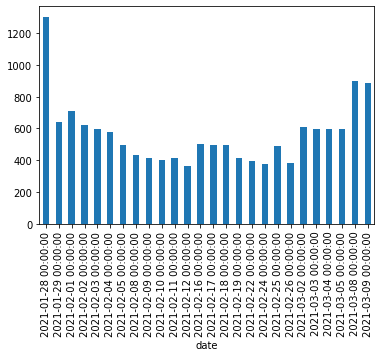

In [85]:
cdf.groupby(cdf.index)['incarcerated_person_active_positive'].sum().plot(kind='bar')

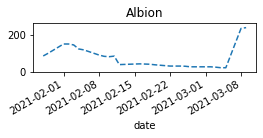

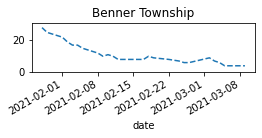

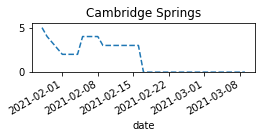

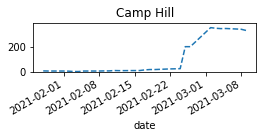

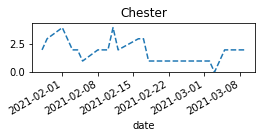

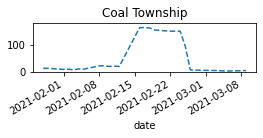

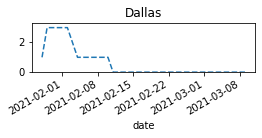

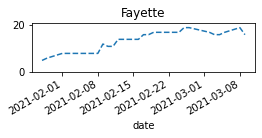

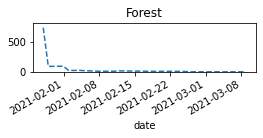

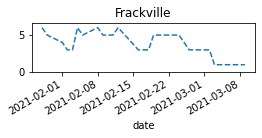

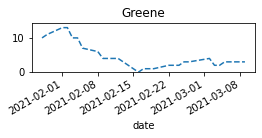

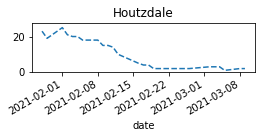

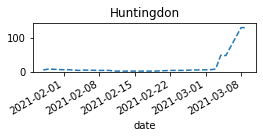

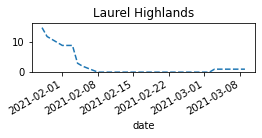

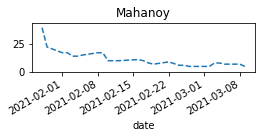

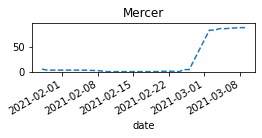

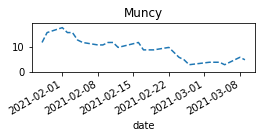

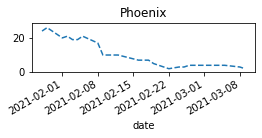

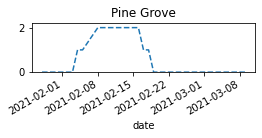

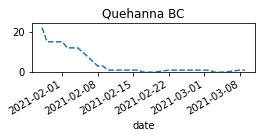

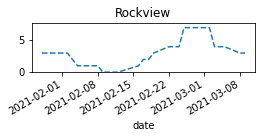

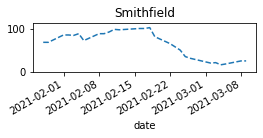

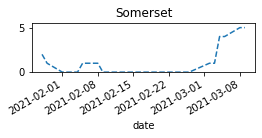

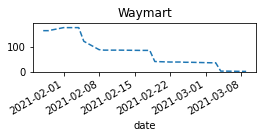

In [72]:
for sci, sdf in cdf.groupby(cdf['SCI']):
    sdf['incarcerated_person_active_positive'].plot(title=sci, figsize=(4,1), linestyle='--')
    plt.ylim([0,sdf['incarcerated_person_active_positive'].max()*1.1])
    plt.show()

In [298]:
cdf

,SCI,incarcerated_person_active_positive,incarcerated_person_asymptomatic_positive,incarcerated_person_deaths,staff_active_cases,staff_deaths
date,,,,,,
2021-01-28,Albion,88,58,2,40,0
2021-01-28,Benner Township,28,21,5,5,0
2021-01-28,Cambridge Springs,5,2,1,5,0
2021-01-28,Camp Hill,10,9,3,29,1
2021-01-28,Chester,2,2,10,10,0
...,...,...,...,...,...,...
2021-02-11,Quehanna BC,1,0,0,0,0
2021-02-11,Rockview,0,0,1,1,0
2021-02-11,Smithfield,99,97,6,4,1


In [37]:
cdf.loc['2021-02-26'].sum(axis=0)

SCI                                          AlbionBenner TownshipCambridge SpringsCamp Hil...
incarcerated_person_active_positive                                                        385
incarcerated_person_asymptomatic_positive                                                  316
incarcerated_person_deaths                                                                 107
staff_active_cases                                                                         154
staff_deaths                                                                                 4
dtype: object

In [38]:
cdf.loc['2021-03-02'].sum(axis=0)

SCI                                          AlbionBenner TownshipCambridge SpringsCamp Hil...
incarcerated_person_active_positive                                                        608
incarcerated_person_asymptomatic_positive                                                  535
incarcerated_person_deaths                                                                 110
staff_active_cases                                                                         149
staff_deaths                                                                                 4
dtype: object